In [219]:
import pandas as pd
import datetime 
import calendar 
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
data = pd.read_csv("orders2.csv")

In [221]:
data.head()

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products
0,25583,03/08/2019 21:58,Tandoori Mixed Grill,1,11.95,12
1,25583,03/08/2019 21:58,Madras Sauce,1,3.95,12
2,25583,03/08/2019 21:58,Mushroom Rice,2,3.95,12
3,25583,03/08/2019 21:58,Garlic Naan,1,2.95,12
4,25583,03/08/2019 21:58,Paratha,1,2.95,12


In [222]:
data["Order Date"] = pd.to_datetime(data['Order Date'], dayfirst = True)
data['hour'] = data["Order Date"].dt.hour
data['date'] = data["Order Date"].dt.date
data["total_price"] = data["Quantity"]* data["Product Price"]

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119183 entries, 0 to 119182
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Order ID        119183 non-null  int64         
 1   Order Date      119183 non-null  datetime64[ns]
 2   Item Name       119183 non-null  object        
 3   Quantity        119183 non-null  int64         
 4   Product Price   119183 non-null  float64       
 5   Total products  119183 non-null  int64         
 6   hour            119183 non-null  int64         
 7   date            119183 non-null  object        
 8   total_price     119183 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 8.2+ MB


In [224]:
data.head()

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products,hour,date,total_price
0,25583,2019-08-03 21:58:00,Tandoori Mixed Grill,1,11.95,12,21,2019-08-03,11.95
1,25583,2019-08-03 21:58:00,Madras Sauce,1,3.95,12,21,2019-08-03,3.95
2,25583,2019-08-03 21:58:00,Mushroom Rice,2,3.95,12,21,2019-08-03,7.90
3,25583,2019-08-03 21:58:00,Garlic Naan,1,2.95,12,21,2019-08-03,2.95
4,25583,2019-08-03 21:58:00,Paratha,1,2.95,12,21,2019-08-03,2.95


In [225]:
x = []
for i in data["Order Date"]:
    x.append(i.strftime("%A"))

data["weekday"] = x

In [226]:
data.head()

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products,hour,date,total_price,weekday
0,25583,2019-08-03 21:58:00,Tandoori Mixed Grill,1,11.95,12,21,2019-08-03,11.95,Saturday
1,25583,2019-08-03 21:58:00,Madras Sauce,1,3.95,12,21,2019-08-03,3.95,Saturday
2,25583,2019-08-03 21:58:00,Mushroom Rice,2,3.95,12,21,2019-08-03,7.90,Saturday
3,25583,2019-08-03 21:58:00,Garlic Naan,1,2.95,12,21,2019-08-03,2.95,Saturday
4,25583,2019-08-03 21:58:00,Paratha,1,2.95,12,21,2019-08-03,2.95,Saturday


In [227]:
data.groupby("weekday").sum()

,Order ID,Quantity,Product Price,Total products,hour,total_price
weekday,,,,,,
Friday,381909119,31470,130079.60,185511,466330,146843.95
Monday,134396789,10947,44764.35,62071,158779,50848.70
Saturday,596791970,49469,200067.80,289781,720747,224390.95
Sunday,268836153,22519,89703.20,130514,319878,101884.50
Thursday,171697047,13447,56979.10,77433,200091,64109.25
Tuesday,122305021,9954,41670.65,57148,146958,46951.05
Wednesday,133976698,11038,45542.70,61193,161313,52070.45


In [228]:
data.groupby("Item Name").sum().sort_values(by = "total_price", ascending = False)

,Order ID,Quantity,Product Price,Total products,hour,total_price
Item Name,,,,,,
Chicken Tikka Masala,52494216,3970,31217.60,24855,64000,35531.50
Pilau Rice,126947939,11754,24697.40,57727,153347,34674.30
Bombay Aloo,62864244,4336,24561.60,28397,75821,25799.20
Naan,99735606,8730,16702.50,44939,122611,21825.00
Korma,17398711,1991,15207.45,12305,31004,17892.45
...,...,...,...,...,...,...
Dhansak - prawn,16575,1,9.95,5,19,9.95
Cylon - prawn,16830,1,9.95,6,17,9.95
Kurma Sauce,9451,2,9.90,15,37,9.90


In [278]:
i = data[data["Item Name"] == "Chicken Tikka Masala"]

In [264]:
i.groupby("weekday").sum()

,Order ID,Quantity,Product Price,Total products,hour,total_price
weekday,,,,,,
Friday,11982193,875,7115.25,5649,14676,7831.25
Monday,4026352,315,2389.65,1925,4891,2819.25
Saturday,17264132,1324,10310.40,8084,21194,11849.80
Sunday,6799707,538,4179.65,3384,8425,4815.10
Thursday,4815408,348,2783.45,2252,5680,3114.60
Tuesday,3361939,255,1986.90,1613,4083,2282.25
Wednesday,4244485,315,2452.30,1948,5051,2819.25


In [231]:
weekdays = data["weekday"].unique().tolist()

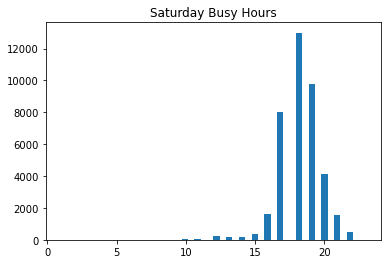

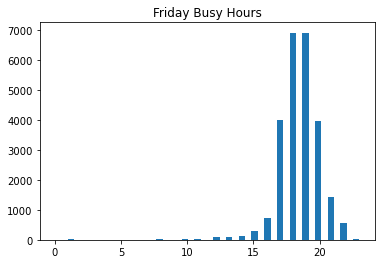

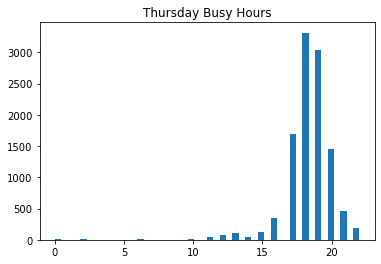

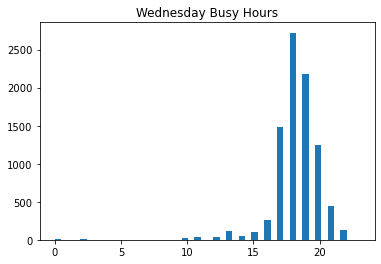

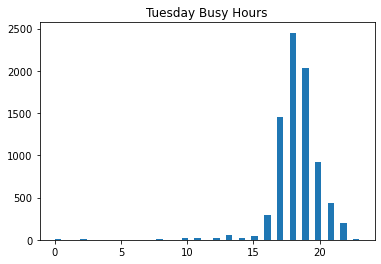

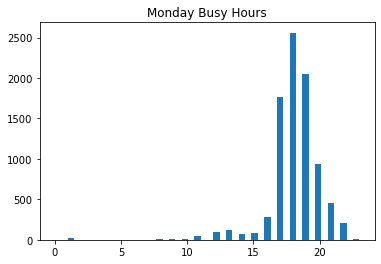

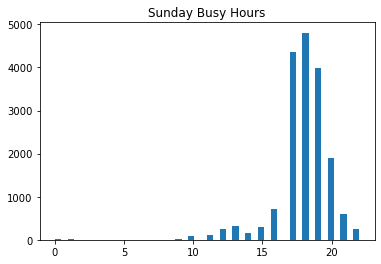

In [232]:
for x in weekdays:
    y_data = data[data["weekday"] == x]
    ax = plt.axes()
    plt.hist(y_data["hour"], bins = 48)
    ax.set_title(x + " Busy Hours")
    plt.show()

In [233]:
data.groupby("weekday")["total_price"].sum()

weekday
Friday       146843.95
Monday        50848.70
Saturday     224390.95
Sunday       101884.50
Thursday      64109.25
Tuesday       46951.05
Wednesday     52070.45
Name: total_price, dtype: float64

In [234]:
data.groupby("weekday")["total_price"].mean()

weekday
Friday       5.824598
Monday       5.811280
Saturday     5.670161
Sunday       5.702703
Thursday     5.857936
Tuesday      5.857167
Wednesday    5.902341
Name: total_price, dtype: float64

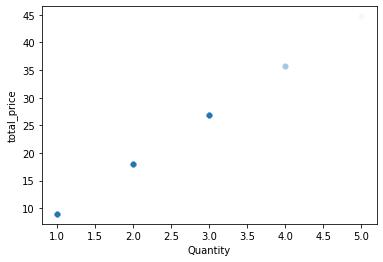

In [235]:
sns.scatterplot(data=i, y="total_price", x="Quantity", alpha = 0.05)

In [236]:
data

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products,hour,date,total_price,weekday
0,25583,2019-08-03 21:58:00,Tandoori Mixed Grill,1,11.95,12,21,2019-08-03,11.95,Saturday
1,25583,2019-08-03 21:58:00,Madras Sauce,1,3.95,12,21,2019-08-03,3.95,Saturday
2,25583,2019-08-03 21:58:00,Mushroom Rice,2,3.95,12,21,2019-08-03,7.90,Saturday
3,25583,2019-08-03 21:58:00,Garlic Naan,1,2.95,12,21,2019-08-03,2.95,Saturday
4,25583,2019-08-03 21:58:00,Paratha,1,2.95,12,21,2019-08-03,2.95,Saturday
...,...,...,...,...,...,...,...,...,...,...
119178,8144,2017-02-13 12:59:00,House Red wine 75cl,1,17.95,18,12,2017-02-13,17.95,Monday
119179,7463,2017-01-03 19:13:00,House white wine 75cl,1,17.95,6,19,2017-01-03,17.95,Tuesday
119180,6719,2016-11-24 18:35:00,House Red wine 75cl,1,17.95,6,18,2016-11-24,17.95,Thursday
119181,5251,2016-08-21 17:55:00,House white wine 75cl,1,17.95,9,17,2016-08-21,17.95,Sunday


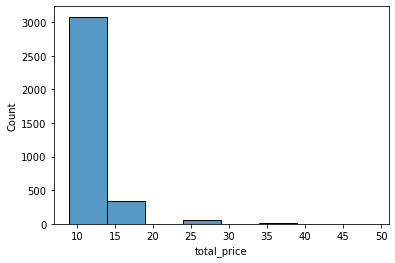

In [237]:
sns.histplot(data = i, x = "total_price", binwidth= 5)

In [238]:
data.sum()

Order ID                                                 1809912797
Item Name         Tandoori Mixed GrillMadras SauceMushroom RiceG...
Quantity                                                     148844
Product Price                                                608807
Total products                                               863651
hour                                                        2174096
total_price                                                  687099
weekday           SaturdaySaturdaySaturdaySaturdaySaturdaySaturd...
dtype: object

In [239]:
by_date = data.groupby("date").sum()

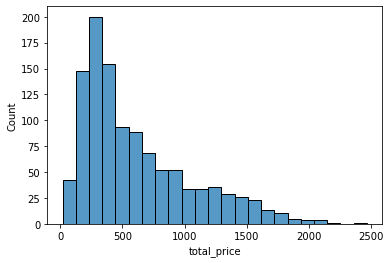

In [240]:
sns.histplot(by_date, x = "total_price")

In [241]:
by_date.reset_index(inplace=True)

In [242]:
by_date["date"] = pd.to_datetime(by_date['date'], dayfirst = True)
by_date['month'] = by_date["date"].dt.month
by_date['year'] = by_date["date"].dt.year

In [243]:
x = []
for i in by_date["date"]:
    x.append(i.strftime("%A"))

by_date["weekday"] = x

In [244]:
by_date.groupby("weekday").mean()

,Order ID,Quantity,Product Price,Total products,hour,total_price,month,year
weekday,,,,,,,,
Friday,2.372106e+06,195.465839,807.947826,1152.242236,2896.459627,912.074224,6.565217,2017.534161
Monday,8.560305e+05,69.726115,285.123248,395.356688,1011.331210,323.877070,6.464968,2017.560510
Saturday,3.706782e+06,307.260870,1242.657143,1799.881988,4476.689441,1393.732609,6.602484,2017.534161
Sunday,1.669790e+06,139.869565,557.162733,810.645963,1986.819876,632.822981,6.527950,2017.534161
Thursday,1.073107e+06,84.043750,356.119375,483.956250,1250.568750,400.682812,6.543750,2017.543750
Tuesday,7.692140e+05,62.603774,262.079560,359.421384,924.264151,295.289623,6.427673,2017.540881
Wednesday,8.321534e+05,68.559006,282.873913,380.080745,1001.944099,323.418944,6.534161,2017.527950


In [245]:
by_date.groupby("year").sum()

,Order ID,Quantity,Product Price,Total products,hour,total_price,month
year,,,,,,,
2015,14672,7,32.65,56,133,32.65,12
2016,93821118,19889,78768.95,114772,287517,89834.70,1703
2017,383663749,45390,184471.15,264693,661160,209038.10,2370
2018,715825035,51030,211018.05,294453,744027,237790.20,2346
2019,616588223,32528,134516.60,189677,481259,150403.20,876


In [246]:
by_date = by_date[~(by_date["year"] == 2015)]

In [247]:
by_date

,date,Order ID,Quantity,Product Price,Total products,hour,total_price,month,year,weekday
1,2016-05-27,494489,147,544.65,824,2027,645.95,5,2016,Friday
2,2016-05-28,863107,237,969.65,1440,3595,1085.10,5,2016,Saturday
3,2016-05-29,586072,170,609.50,919,2391,729.40,5,2016,Sunday
4,2016-05-30,520351,158,547.00,926,2105,647.95,5,2016,Monday
5,2016-05-31,357248,94,419.30,558,1417,473.45,5,2016,Tuesday
...,...,...,...,...,...,...,...,...,...,...
1115,2019-07-30,2396266,109,468.75,488,1777,530.35,7,2019,Tuesday
1116,2019-07-31,688532,29,160.25,151,517,165.70,7,2019,Wednesday
1117,2019-08-01,2168538,99,444.40,555,1635,504.60,8,2019,Thursday
1118,2019-08-02,3804434,168,785.40,1031,2746,841.05,8,2019,Friday


In [248]:
weather = pd.read_csv("weather_data_london.csv")

In [249]:
df2 = weather[["Year", "Month", "Date"]].copy()
df2.columns = ["year", "month", "day"]

dates = pd.to_datetime(df2)

In [250]:
weather["date"] = dates

In [251]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Year       1339 non-null   int64         
 1   Month      1339 non-null   int64         
 2   Date       1339 non-null   int64         
 3   Max Temp   1339 non-null   int64         
 4   Avg Temp   1339 non-null   float64       
 5   Min Temp   1339 non-null   int64         
 6   Max Dew    1339 non-null   int64         
 7   Avg Dew    1339 non-null   float64       
 8   Min Dew    1339 non-null   int64         
 9   Max Humid  1339 non-null   int64         
 10  Avg Humid  1339 non-null   float64       
 11  Min Humid  1339 non-null   int64         
 12  Max Wind   1339 non-null   int64         
 13  Avg Wind   1339 non-null   float64       
 14  Min Wind   1339 non-null   int64         
 15  Max Pres   1339 non-null   float64       
 16  Avg Pres   1339 non-null   float64       


In [252]:
weather.drop(["Max Temp", "Min Temp", "Max Dew", "Min Dew", "Max Humid", "Min Humid", "Max Wind", "Min Wind", "Max Pres", "Min Pres"], 1, inplace=True)

In [253]:
by_date.drop(["Order ID", "Product Price", "Total products", "hour", "month", "year"], 1, inplace = True)

In [254]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Year       1339 non-null   int64         
 1   Month      1339 non-null   int64         
 2   Date       1339 non-null   int64         
 3   Avg Temp   1339 non-null   float64       
 4   Avg Dew    1339 non-null   float64       
 5   Avg Humid  1339 non-null   float64       
 6   Avg Wind   1339 non-null   float64       
 7   Avg Pres   1339 non-null   float64       
 8   date       1339 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 94.3 KB


In [255]:
merged = pd.merge(weather, by_date, how = "inner", on = "date")

In [256]:
merged.drop("Date", 1, inplace = True)

In [257]:
corr = merged.corr()

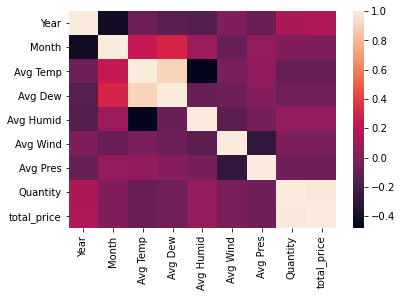

In [258]:
sns.heatmap(corr)

In [259]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119 entries, 0 to 1118
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         1119 non-null   int64         
 1   Month        1119 non-null   int64         
 2   Avg Temp     1119 non-null   float64       
 3   Avg Dew      1119 non-null   float64       
 4   Avg Humid    1119 non-null   float64       
 5   Avg Wind     1119 non-null   float64       
 6   Avg Pres     1119 non-null   float64       
 7   date         1119 non-null   datetime64[ns]
 8   Quantity     1119 non-null   int64         
 9   total_price  1119 non-null   float64       
 10  weekday      1119 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 104.9+ KB


In [153]:
corr

,Year,Month,Avg Temp,Avg Dew,Avg Humid,Avg Wind,Avg Pres,Quantity,total_price
Year,1.000000,-0.417696,-0.061737,-0.143964,-0.152608,-0.008519,-0.084550,0.144490,0.157220
Month,-0.417696,1.000000,0.231768,0.310047,0.091532,-0.087770,0.066283,-0.002651,-0.004977
Avg Temp,-0.061737,0.231768,1.000000,0.910771,-0.483828,-0.020249,0.060158,-0.080303,-0.078270
Avg Dew,-0.143964,0.310047,0.910771,1.000000,-0.085608,-0.065769,0.023310,-0.054753,-0.054371
Avg Humid,-0.152608,0.091532,-0.483828,-0.085608,1.000000,-0.129388,-0.032431,0.072500,0.068005
Avg Wind,-0.008519,-0.087770,-0.020249,-0.065769,-0.129388,1.000000,-0.287781,-0.015526,-0.018458
Avg Pres,-0.084550,0.066283,0.060158,0.023310,-0.032431,-0.287781,1.000000,-0.064108,-0.064842
Quantity,0.144490,-0.002651,-0.080303,-0.054753,0.072500,-0.015526,-0.064108,1.000000,0.993868
total_price,0.157220,-0.004977,-0.078270,-0.054371,0.068005,-0.018458,-0.064842,0.993868,1.000000


In [287]:
i_by_date = i.groupby("date").sum()

In [288]:
i_by_date.reset_index(inplace=True)

In [292]:
i_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            974 non-null    object 
 1   Order ID        974 non-null    int64  
 2   Quantity        974 non-null    int64  
 3   Product Price   974 non-null    float64
 4   Total products  974 non-null    int64  
 5   hour            974 non-null    int64  
 6   total_price     974 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 53.4+ KB


In [293]:
i_by_date["date"] = pd.to_datetime(i_by_date["date"])
merged = pd.merge(weather, i_by_date, how = "inner", on = "date")

In [300]:
x = []
for j in merged["date"]:
    x.append(j.strftime("%A"))

merged["weekday"] = x

In [301]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 973
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Year            974 non-null    int64         
 1   Month           974 non-null    int64         
 2   Date            974 non-null    int64         
 3   Avg Temp        974 non-null    float64       
 4   Avg Dew         974 non-null    float64       
 5   Avg Humid       974 non-null    float64       
 6   Avg Wind        974 non-null    float64       
 7   Avg Pres        974 non-null    float64       
 8   date            974 non-null    datetime64[ns]
 9   Order ID        974 non-null    int64         
 10  Quantity        974 non-null    int64         
 11  Product Price   974 non-null    float64       
 12  Total products  974 non-null    int64         
 13  hour            974 non-null    int64         
 14  total_price     974 non-null    float64       
 15  weekda

In [302]:
corr = merged.corr()

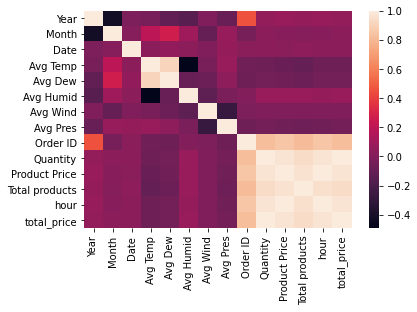

In [303]:
sns.heatmap(corr)

In [305]:
merged.drop(["Total products", "Product Price", "Order ID", "hour"], 1, inplace=True)

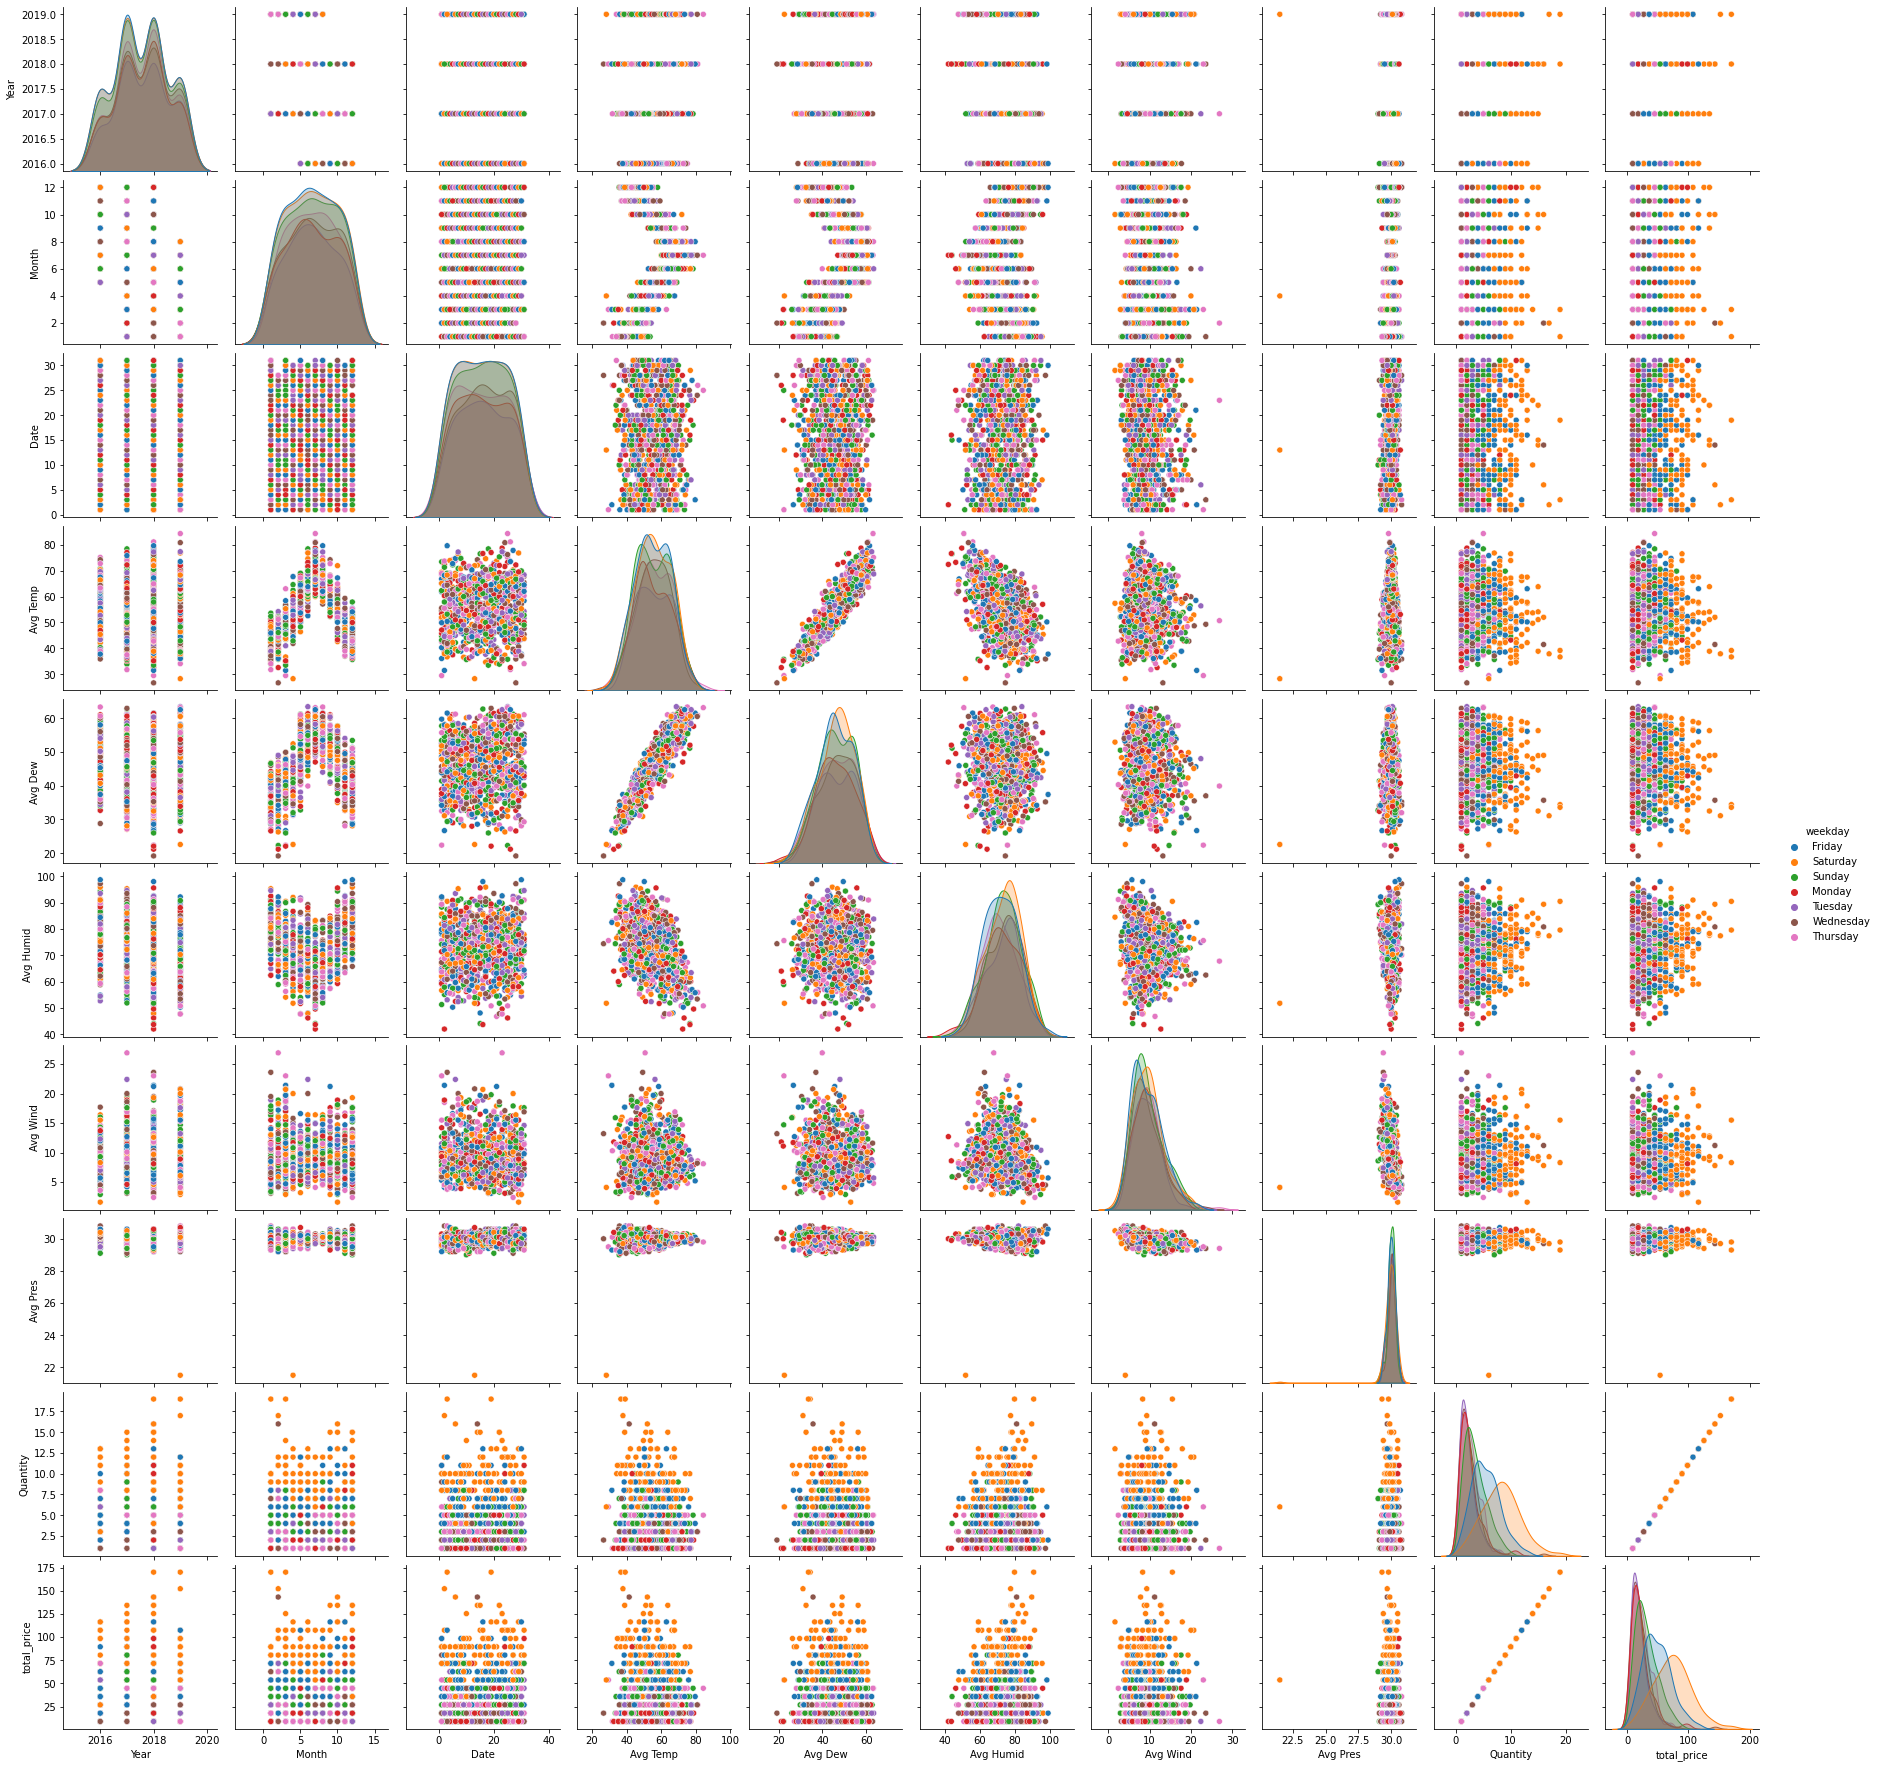

In [306]:
sns.pairplot(data = merged, hue = "weekday")

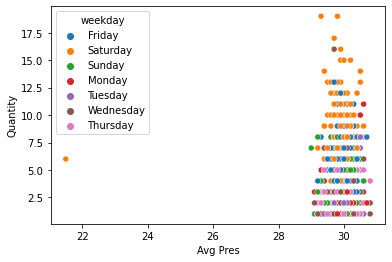

In [315]:
sns.scatterplot(data = merged, x = "Avg Pres", y ="Quantity", hue = "weekday")

In [286]:
i

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products,hour,date,total_price,weekday
11,25583,2019-08-03 21:58:00,Chicken Tikka Masala,1,8.95,12,21,2019-08-03,8.95,Saturday
99,25567,2019-08-03 18:51:00,Chicken Tikka Masala,1,8.95,4,18,2019-08-03,8.95,Saturday
106,25566,2019-08-03 18:48:00,Chicken Tikka Masala,1,8.95,8,18,2019-08-03,8.95,Saturday
140,25562,2019-08-03 18:23:00,Chicken Tikka Masala,1,8.95,6,18,2019-08-03,8.95,Saturday
146,25560,2019-08-03 18:18:00,Chicken Tikka Masala,1,8.95,9,18,2019-08-03,8.95,Saturday
...,...,...,...,...,...,...,...,...,...,...
109389,4508,2016-05-28 17:35:00,Chicken Tikka Masala,1,8.95,7,17,2016-05-28,8.95,Saturday
109398,4500,2016-05-27 19:54:00,Chicken Tikka Masala,1,8.95,6,19,2016-05-27,8.95,Friday
109405,4498,2016-05-27 19:17:00,Chicken Tikka Masala,1,8.95,12,19,2016-05-27,8.95,Friday
109409,4494,2016-05-27 18:59:00,Chicken Tikka Masala,2,8.95,9,18,2016-05-27,17.90,Friday
